In [86]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [87]:
region = 'Dp'
separate_region = False
if separate_region:
    all_dfovf_select = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl'))
    all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
    all_dfovf_select_rg.to_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))

In [88]:
compute_response = False
if compute_response:
    all_dfovf_select_rg = pd.read_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))
    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select_rg, time_window, frame_rate)
    all_response.to_pickle(os.path.join(dtpar.db_dir, f'all_response_select_{region}.pkl'))
    all_response

In [89]:
all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))
all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                  0.000200  0.209071  0.492094  0.474856 -0.013714   
      1                  0.243173 -0.022423  0.559050  0.397474  0.015055   
      2                  0.036004  0.048652  0.147587 -0.068843 -0.078841   
trp   0                 -0.020108  0.409061 -0.034526  0.172329  0.252261   
      1                  0.098764  0.288644  0.048206  0.129740  0.178743   
      2                  0.118979  0.330661 -0.034567 -0.066544  0.074195   
arg   0                  0.043738  0.141261 -0.030435  0.065854  0.461075   
      1                  0.069129  0.117999  0.238499  0.419269  0.127385   
      2                  0.017971  0.179629  0.189134  0.373900 -0.084077   
tdca  0                  0.055465  0.117861  0.071263 -0.057732  0.127823   
      1                  0.021753  0.089649 -0.086117 -0.004822 -0.021328   
      2                  0.075765  0.177125 -0.023670  0.316943  0.012088   
tca   0                  0.029793  0.113502  0.041647  0.120897  0.015454   
      1                  0.061789  0.046316  0.015583  0.064048  0.133865   
      2                  0.094398  0.015964 -0.001715 -0.047148  0.029763   
gca   0                 -0.062147 -0.072202 -0.056622  0.064611  0.056811   
      1                 -0.312422  0.081823  0.070302 -0.062725 -0.037224   
      2                  0.003238  0.111933  0.087542 -0.111042 -0.096473   
acsf  0                  0.129578  0.067252  0.113606  0.020651 -0.075632   
      1                  0.106135 -0.073797  0.018098  0.075378  0.125090   
      2                  0.164553  0.118102  0.104945  0.196501 -0.006301   
spont 0                  0.003318  0.107230  0.016274  0.087140  0.012023   
      1                  0.012960  0.026936 -0.073952 -0.121734 -0.027901   
      2                 -0.039621  0.006412 -0.098490 -0.204592  0.037356   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.024605 -0.074521  0.092936 -0.007029 -0.020326  ...   
      1      0.074823 -0.010026  0.089967  0.020651 -0.006347  ...   
      2      0.151725 -0.014862  0.169540  0.140089  0.169556  ...   
trp   0      0.129817 -0.032269  0.094983  0.094825  0.048034  ...   
      1      0.128250  0.042115 -0.102639  0.068903  0.016555  ...   
      2     -0.059373  0.075893  0.065007  0.023148  0.116972  ...   
arg   0      0.033696  0.019058  0.010971  0.049436 -0.005199  ...   
      1      0.316417  0.155094 -0.021431  0.130642 -0.053902  ...   
      2     -0.059250  0.010679 -0.005548  0.056502  0.068987  ...   
tdca  0     -0.077840 -0.020798  0.098266  0.109144  0.045656  ...   
      1     -0.067299  0.038679 -0.030768  0.132517 -0.008783  ...   
      2     -0.078445  0.103355  0.056961 -0.014215  0.160220  ...   
tca   0     -0.133252  0.088258 -0.044862 -0.038487 -0.018844  ...   
      1      0.051403  0.103149  0.100475 -0.043041  0.059922  ...   
      2     -0.042293  0.114024  0.019450  0.101233  0.048663  ...   
gca   0      0.031446  0.085682 -0.075024 -0.078493 -0.037200  ...   
      1     -0.103984 -0.015952 -0.051851  0.009455 -0.064217  ...   
      2     -0.009670  0.017204  0.094498  0.088863 -0.051786  ...   
acsf  0      0.079401  0.060205  0.111486  0.047103 -0.052355  ...   
      1     -0.002489  0.144969  0.066520 -0.048894 -0.017864  ...   
      2      0.0

In [230]:
# Scale responses
responses = catscale.standard_scale(all_response)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [231]:
responses

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                 -0.398815  0.869787  2.614093  2.084132 -0.529511   
      1                  2.055415 -1.159753  3.032630  1.661676 -0.293125   
      2                 -0.037170 -0.536624  0.460582 -0.884100 -1.064649   
trp   0                 -0.603946  2.623124 -0.677807  0.432537  1.655945   
      1                  0.596759  1.567418 -0.160650  0.200028  1.051865   
      2                  0.800952  1.935785 -0.678060 -0.871551  0.192815   
arg   0                  0.040956  0.275287 -0.652233 -0.148749  3.371722   
      1                  0.297422  0.071348  1.028874  1.780663  0.629866   
      2                 -0.219310  0.611662  0.720293  1.532981 -1.107670   
tdca  0                  0.159409  0.070137 -0.016520 -0.823443  0.633460   
      1                 -0.181114 -0.177198 -1.000302 -0.534589 -0.592074   
      2                  0.364456  0.589711 -0.609947  1.222031 -0.317504   
tca   0                 -0.099908  0.031925 -0.201649  0.151749 -0.289846   
      1                  0.223279 -0.557103 -0.364573 -0.158606  0.683107   
      2                  0.552657 -0.823204 -0.472705 -0.765663 -0.172273   
gca   0                 -1.028570 -1.596167 -0.815928 -0.155534  0.049975   
      1                 -3.556558 -0.245811 -0.022526 -0.850704 -0.722693   
      2                 -0.368130  0.018168  0.085239 -1.114482 -1.209530   
acsf  0                  0.908004 -0.373558  0.248167 -0.395524 -1.038278   
      1                  0.671219 -1.610156 -0.348855 -0.096754  0.611007   
      2                  1.261289  0.072252  0.194029  0.564499 -0.468600   
spont 0                 -0.367323 -0.023068 -0.360253 -0.032542 -0.318036   
      1                 -0.269930 -0.727010 -0.924256 -1.172854 -0.646089   
      2                 -0.801044 -0.906953 -1.077644 -1.625202 -0.109883   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.409246 -2.018238  0.735979 -0.552843 -0.562676  ...   
      1      0.584434 -0.895542  0.693371 -0.136957 -0.364853  ...   
      2      1.352988 -0.979719  1.835481  1.657513  2.124436  ...   
trp   0      1.134037 -1.282730  0.765367  0.977451  0.404720  ...   
      1      1.118384  0.012115 -2.071117  0.588001 -0.040749  ...   
      2     -0.756713  0.600108  0.335116 -0.099450  1.380289  ...   
arg   0      0.173414 -0.389245 -0.440472  0.295521 -0.348604  ...   
      1      2.998905  1.978808 -0.905528  1.515590 -1.037822  ...   
      2     -0.755487 -0.535118 -0.677560  0.401683  0.701233  ...   
tdca  0     -0.941267 -1.083053  0.812489  1.192589  0.371072  ...   
      1     -0.835922 -0.047702 -1.039542  1.543760 -0.399320  ...   
      2     -0.947320  1.078161  0.219630 -0.660801  1.992307  ...   
tca   0     -1.495054  0.815361 -1.241840 -1.025470 -0.541704  ...   
      1      0.350372  1.074567  0.844189 -1.093895  0.572948  ...   
      2     -0.586020  1.263876 -0.318765  1.073727  0.413627  ...   
gca   0      0.150926  0.770514 -1.674763 -1.626543 -0.801461  ...   
      1     -1.202556 -0.998689 -1.342149 -0.305174 -1.183784  ...   
      2     -0.259987 -0.421525  0.758400  0.887875 -1.007870  ...   
acsf  0      0.630183  0.327017  1.002238  0.260455 -1.015927  ...   
      1     -0.188221  1.802557  0.356839 -1.181836 -0.527833  ...   
      2      0.3

In [229]:
# Remvome first trial
remove_first_trial = False
if remove_first_trial:
    responses.drop([0], inplace=True, axis=0, level=1)
    responses.index.remove_unused_levels().levels[0]
    responses

In [ ]:
avg_trials = True
if avg_trials:
    responses = responses.mean(axis)

In [224]:
importlib.reload(caclust)
# Compute cluster labels
labels = caclust.compute_cluster(responses, k=39)

Finding 39 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 6.389163017272949 seconds
Jaccard graph constructed in 1.5439989566802979 seconds
Wrote graph to binary file in 0.3340034484863281 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.629178
After 8 runs, maximum modularity is Q = 0.630355
After 16 runs, maximum modularity is Q = 0.632222
After 27 runs, maximum modularity is Q = 0.633476
Louvain completed 47 runs in 22.2499258518219 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 30.748942136764526 seconds


In [225]:
# Put cluster IDs into the data frame
importlib.reload(caclust)
cluster_df = caclust.get_cluster_df(responses, labels)
cluster_df

(phe, 1)  (phe, 2)  (trp, 1)  \
fish_id                cond    plane neuron                                 
2021-12-31-DpOBEM-N7   naive   3     86     -0.365348 -1.347737 -0.833173   
2021-09-04-DpOBEM-JH18 arg-phe 0     125     0.114306  0.203833 -1.067857   
2022-02-13-DpOBEM-N10  naive   3     359     0.334707 -0.369277  0.470840   
2021-05-01-DpOBEM-JH13 phe-arg 1     14     -0.794838  0.000475 -1.145416   
                                     18      0.337203 -1.175027  1.353117   
...                                               ...       ...       ...   
2021-07-15-DpOBEM-N2   naive   2     278     1.594996 -0.532574 -0.004236   
                                     273    -0.486737 -0.052713  0.075823   
                                     271    -0.282228 -0.359927 -0.568116   
                                     247    -0.277544  0.149791  0.869369   
2021-10-01-DpOBEM-JH21 arg-phe 3     452    -0.003575  1.034778 -0.351863   

                                             (trp, 2)  (arg, 1)  (arg, 2)  \
fish_id                cond    plane neuron                                 
2021-12-31-DpOBEM-N7   naive   3     86     -0.427344  0.009783  0.869786   
2021-09-04-DpOBEM-JH18 arg-phe 0     125     0.402745  0.441056 -1.007587   
2022-02-13-DpOBEM-N10  naive   3     359     0.947693 -0.364229 -0.572126   
2021-05-01-DpOBEM-JH13 phe-arg 1     14     -0.309815  0.795964  0.363095   
                                     18     -1.907928  1.056967  0.310490   
...                                               ...       ...       ...   
2021-07-15-DpOBEM-N2   naive   2     278    -0.568015  2.217805  2.089370   
                                     273    -0.293403  1.941109  1.339647   
                                     271    -0.346517  2.127416  2.676463   
                                     247     0.156641  2.505269  2.698319   
2021-10-01-DpOBEM-JH21 arg-phe 3     452    -0.917464  1.514390  1.150739   

                                             (tdca, 1)  (tdca, 2)  (tca, 1)  \
fish_id                cond    plane neuron                                   
2021-12-31-DpOBEM-N7   naive   3     86      -0.050142   0.231896 -0.990977   
2021-09-04-DpOBEM-JH18 arg-phe 0     125     -0.479943  -0.523575 -0.325339   
2022-02-13-DpOBEM-N10  naive   3     359      0.713521  -0.487913 -0.134974   
2021-05-01-DpOBEM-JH13 phe-arg 1     14       1.538960  -0.660688 -0.727842   
                                     18      -0.923256  -1.089756 -1.218864   
...                                                ...        ...       ...   
2021-07-15-DpOBEM-N2   naive   2     278     -1.027499   1.093066 -0.763383   
                                     273     -0.930012  -0.683786 -0.356861   
                                     271     -0.805519  -0.620800 -0.449746   
                                     247     -0.995212  -0.566116 -0.926044   
2021-10-01-DpOBEM-JH21 arg-phe 3     452      0.497594   0.008776 -0.467484   

                                             (tca, 2)  (gca, 1)  (gca, 2)  \
fish_id                cond    plane neuron                                 
2021-12-31-DpOBEM-N7   naive   3     86      1.680646 -0.077035 -0.708086   
2021-09-04-DpOBEM-JH18 arg-phe 0     125     2.803078  0.874687 -0.099161   
2022-02-13-DpOBEM-N10  naive   3     359     1.851898  0.649085  0.139287   
2021-05-01-DpOBEM-JH13 phe-arg 1     14     -1.530711  0.248422 -1.598863   
                                     18     -0.428233 -0.530796  0.343710   
...                                               ...       ...       ...   
2021-07-15-DpOBEM-N2   naive   2     278     0.216772 -0.329384  0.512478   
                                     273    -1.001849  0.094515 -0.482345   
                                     271    -0.041723 -0.089411  1.327954   
                                     247    -0.785956  0.332703 -0.209282   
2021-10-01-DpOBEM-JH21 arg-phe 3     452    -0.757382  0.577415 -0.527656   

           

/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


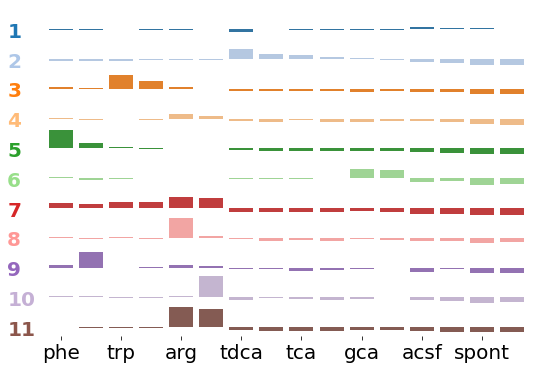

In [226]:
importlib.reload(caclust)
%matplotlib inline
cluster_cmap = 'tab20'
cluster_mean_df = caclust.get_cluster_mean_df(cluster_df)
fig = caclust.plot_cluster_tuning(cluster_mean_df, cmap=cluster_cmap)
fig_dir = dtpar.fig_dir
fig.savefig(os.path.join(fig_dir, f"cluster_mean_{region}.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6.0_arg-phe vs. 6.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:3.543e-01 U_stat=1.300e+01
7.0_arg-phe vs. 7.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:9.433e-01 U_stat=1.900e+01
8.0_arg-phe vs. 8.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:2.844e-01 U_stat=2.800e+01
9.0_arg-phe vs. 9.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:9.324e-02 U_stat=3.200e+01
10.0_arg-phe vs. 10.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:3.543e-01 U_stat=1.300e+01
11.0_arg-phe vs. 11.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.709e-01 U_stat=3.000e+01
3.0_phe-trp vs. 3.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:9.433e-01 U_stat=1.900e+01
4.0_phe-arg vs. 4.0_arg-phe: Mann-Whitney-Wilcoxon test two-sided, P_val:8.286e-01 U_stat=3.700e+01
4.0_phe-trp vs. 4

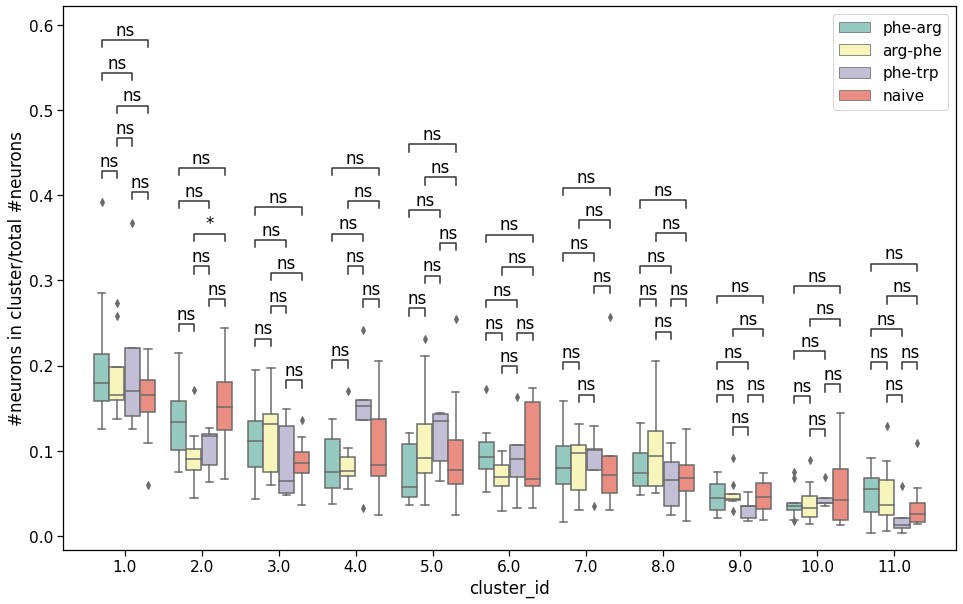

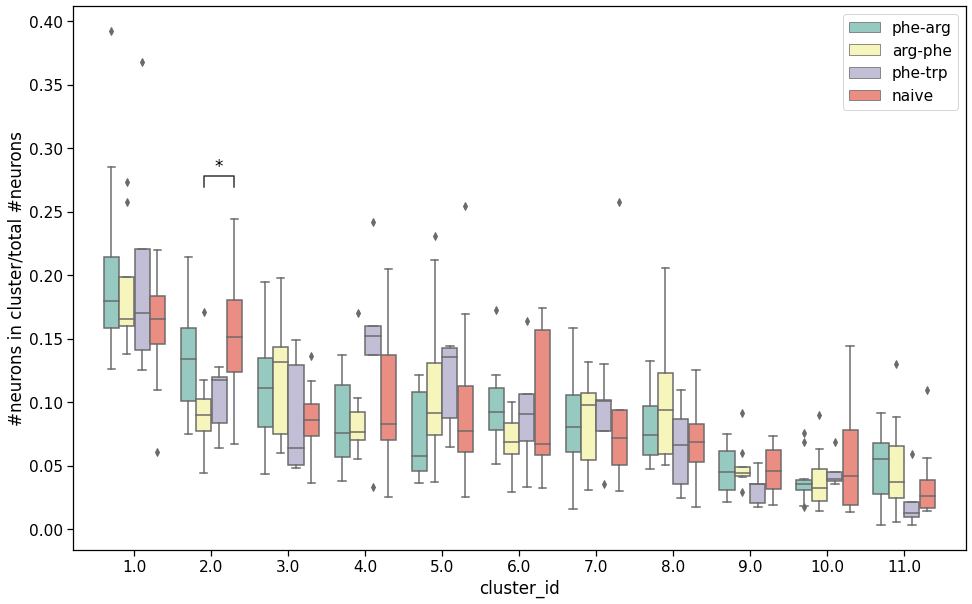

In [228]:
importlib.reload(caclust)
cluster_nrn_df = caclust.get_cluster_nrn_df(cluster_df)

selected_clusters = None
#selected_clusters = np.array([2,4,5,6,8,9,10,11])
# TODO function for select a.a. tuned neurons 
if selected_clusters is not None:
    cluster_nrn_df = cluster_nrn_df[cluster_nrn_df.cluster_id.isin(selected_clusters)]

cluster_count_df = caclust.get_cluster_count_df(cluster_nrn_df, dtpar.cond_list)

#cluster_count_df.to_csv('/media/hubo/WD_BoHu/temp_backup/cluster_count_df.csv')

importlib.reload(caclust)
cluster_ids = cluster_count_df.cluster_id.unique()
all_pairs = caclust.get_all_cond_pairs(dtpar.cond_list, cluster_ids)

importlib.reload(caclust)

#t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
test_method = 'Mann-Whitney'
annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs,
                                                      dtpar.cond_list, test_method=test_method)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs,
                                                       dtpar.cond_list, test_method=test_method)
fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}.svg"))

In [120]:
new_pairs

[]

In [23]:
cluster_df.to_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [24]:
cluster_df = pd.read_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))